In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv("C:/Users/Administrator/Desktop/Boston/Boston.csv")
data = data.drop(data.columns[0], axis=1)
X = data.drop('medv', axis=1)
y = data['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", r2)
print("Mean Squared Error:", mse)

Coefficients: [-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]
Intercept: 22.796534653465343
R² Score: 0.6687594935356322
Mean Squared Error: 24.291119474973495


In [35]:
new_data = pd.DataFrame([[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 392.0, 4.0]], 
                        columns=X.columns)
new_data_scaled = scaler.transform(new_data)
prediction_new = model.predict(new_data_scaled)
print(f"Predicted house price for new data: {prediction_new[0]}")

Predicted house price for new data: 30.39127483311866


In [55]:
X_scaled = scaler.fit_transform(X)
X_b_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])
def linear_regression_train(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta
theta = linear_regression_train(X_b_scaled, y)
def predict(X, theta):
    return X @ theta
y_pred = predict(X_b_scaled, theta)
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_total)
    return r2
r2 = r2_score(y, y_pred)
print("Coefficients:", theta.flatten())
print("R² Score:", r2)

Coefficients: [ 2.25328063e+01 -9.28146064e-01  1.08156863e+00  1.40899997e-01
  6.81739725e-01 -2.05671827e+00  2.67423017e+00  1.94660717e-02
 -3.10404426e+00  2.66221764e+00 -2.07678168e+00 -2.06060666e+00
  8.49268418e-01 -3.74362713e+00]
R² Score: 0.7406426641094095


In [57]:
new_data_b = np.hstack([np.ones((new_data_scaled.shape[0], 1)), new_data_scaled])
prediction_new = predict(new_data_b, theta)
print(f"Predicted house price for new data: {prediction_new[0][0]}")

Predicted house price for new data: 30.472479339273704


In [17]:
def ridge_regression(X, y, lambda_):
    n = X.shape[1]
    I = np.eye(n)
    I[0, 0] = 0 
    theta = np.linalg.inv(X.T @ X + lambda_ * I) @ X.T @ y
    return theta
lambda_ = 10
theta_ridge = ridge_regression(X_b, y, lambda_)
def predict(X, theta):
    return X @ theta
y_pred_ridge = predict(X_b, theta_ridge)
def r2_score(y, y_pred):
    ss_total = np.sum((y - np.mean(y))**2)
    ss_res = np.sum((y - y_pred)**2)
    return 1 - (ss_res / ss_total)
print("R² score (Ridge):", r2_score(y, y_pred_ridge))

R² score (Ridge): 0.7315744764907286


In [59]:
prediction_ridge = predict(new_data_b, theta_ridge)
print(f"Predicted house price (Ridge): {prediction_ridge[0][0]}")

Predicted house price (Ridge): 30.328633440886186


In [47]:
def lasso_regression(X, y, lambda_, num_iters=1000, tol=1e-4):
    m, n = X.shape
    theta = np.zeros((n, 1))
    
    for _ in range(num_iters):
        theta_old = theta.copy()
        for j in range(n):
            X_j = X[:, j].reshape(-1, 1)
            y_pred = X @ theta
            residual = y - y_pred + theta[j] * X_j
            
            rho = np.sum(X_j * residual)
            
            if j == 0:
                
                theta[j] = rho / np.sum(X_j ** 2)
            else:
                if rho < -lambda_ / 2:
                    theta[j] = (rho + lambda_ / 2) / np.sum(X_j ** 2)
                elif rho > lambda_ / 2:
                    theta[j] = (rho - lambda_ / 2) / np.sum(X_j ** 2)
                else:
                    theta[j] = 0.0
                    
        if np.linalg.norm(theta - theta_old, ord=1) < tol:
            break
            
    return theta

def predict(X, theta):
    return X @ theta

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_res / ss_total)

lambda_ = 10
theta_lasso = lasso_regression(X_b_scaled, y, lambda_)

y_pred_lasso = predict(X_b_scaled, theta_lasso)

print("R² score (Lasso):", r2_score(y, y_pred_lasso))

R² score (Lasso): 0.7405643164796262


In [61]:
prediction_new = predict(new_data_b, theta_lasso)

print(f"Predicted house price (Lasso) for new data: {prediction_new[0][0]}")

Predicted house price (Lasso) for new data: 30.577115373097527


Learned parameters (theta):
 [[22.53183355]
 [-0.76000917]
 [ 0.77192978]
 [-0.29571433]
 [ 0.74551208]
 [-1.4694323 ]
 [ 2.89271159]
 [-0.11476216]
 [-2.58595542]
 [ 1.33783915]
 [-0.8285727 ]
 [-1.91303358]
 [ 0.86260517]
 [-3.55323053]]


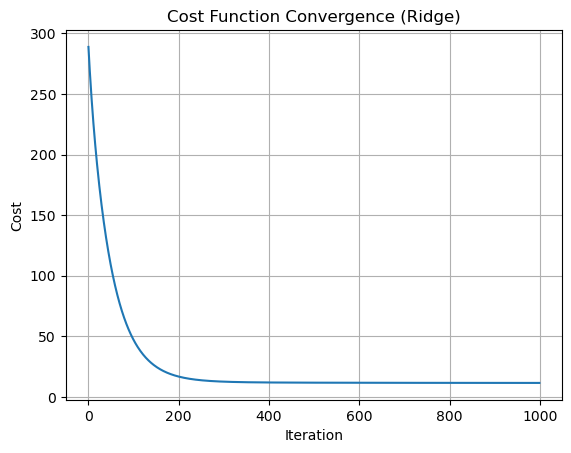

In [67]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_scaled = (X - mean) / std
X_b = np.hstack([np.ones((X.shape[0], 1)), X_scaled])
m, n = X_b.shape
theta = np.zeros((n, 1))
alpha = 0.01
epochs = 1000
lambda_reg = 10

cost_history = []
def compute_cost(X, y, theta, lambda_reg):
    m = X.shape[0]
    predictions = X @ theta
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error ** 2) + (lambda_reg / (2 * m)) * np.sum(theta[1:] ** 2)
    return cost

for i in range(epochs):
    predictions = X_b @ theta
    error = predictions - y

    gradients = (1 / m) * (X_b.T @ error) + (lambda_reg / m) * np.vstack([[0], theta[1:]])  # Do not regularize intercept
    theta -= alpha * gradients
    cost_history.append(compute_cost(X_b, y, theta, lambda_reg))

print("Learned parameters (theta):\n", theta)

plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Convergence (Ridge)')
plt.grid(True)
plt.show()

In [63]:
prediction = new_data_b @ theta 

print(f"Predicted house price: {prediction[0][0]}")

Predicted house price: 30.472479339273704
